# Data Engineer

## Bağlantı

In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 155047 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.26-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [2]:
!mkdir -p drive
!google-drive-ocamlfuse drive
!ls

adc.json  drive  sample_data


## Modul

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Dataset import

In [5]:
df = pd.read_csv('/content/drive/Colab Notebooks/diabetes/data.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data analysis

## Explorer datasets

In [6]:
df.shape

(768, 9)

In [7]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Statistical summary

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Cleaning

In [11]:
df.shape

(768, 9)

In [12]:
df=df.drop_duplicates()

In [13]:
df.shape

(768, 9)

## Find the null values 

In [14]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Check the no of zero values in dataset

In [16]:
print('No. of zero values in Glucose',df[df['Glucose']==0].shape[0])

No. of zero values in Glucose 5


In [17]:
print('No. of zero values in BloodPressure',df[df['BloodPressure']==0].shape[0])

No. of zero values in BloodPressure 35


In [18]:
print('No. of zero values in SkinThickness',df[df['SkinThickness']==0].shape[0])

No. of zero values in SkinThickness 227


In [19]:
print('No. of zero values in Insulin',df[df['Insulin']==0].shape[0])

No. of zero values in Insulin 374


In [20]:
print('No. of zero values in BMI',df[df['BMI']==0].shape[0])

No. of zero values in BMI 11


## Replace no of zero vallues with mean of that columns

In [22]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [21]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
print('No. of zero values in Glucose', df[df['Glucose']==0].shape[0])

No. of zero values in Glucose 0


In [23]:
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

In [24]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Visualization

Negative (0):  500
Positive (1):  268


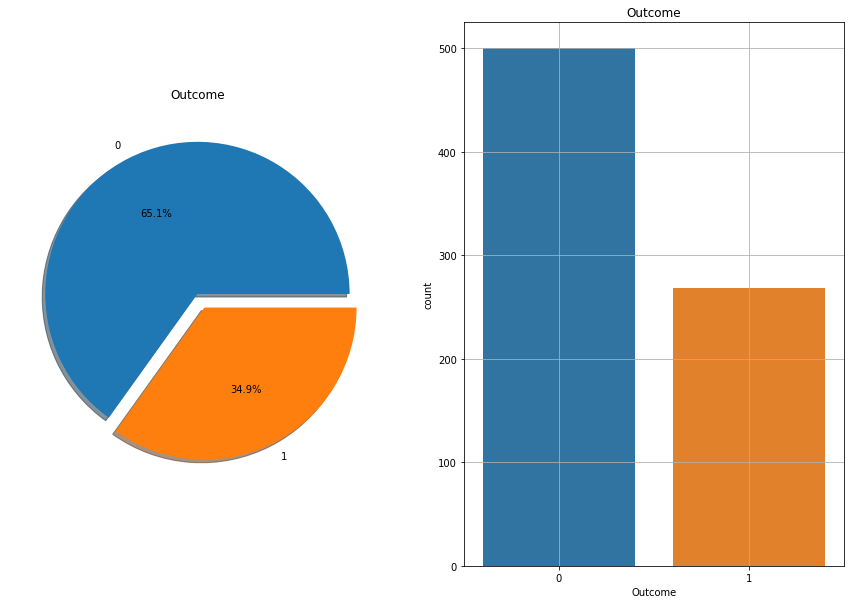

In [25]:
f,ax=plt.subplots(1,2,figsize=(15,10))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot('Outcome',data=df,ax=ax[1])
ax[1].set_title('Outcome')
N,P = df['Outcome'].value_counts()
print('Negative (0): ', N)
print('Positive (1): ',P)
plt.grid()
plt.show()

## Histograms

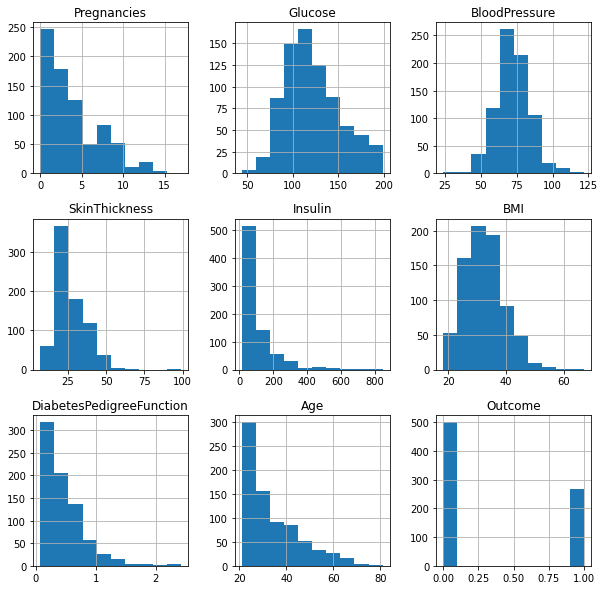

In [28]:
df.hist(bins=10,figsize=(10,10))
plt.show()

## Scatter plot

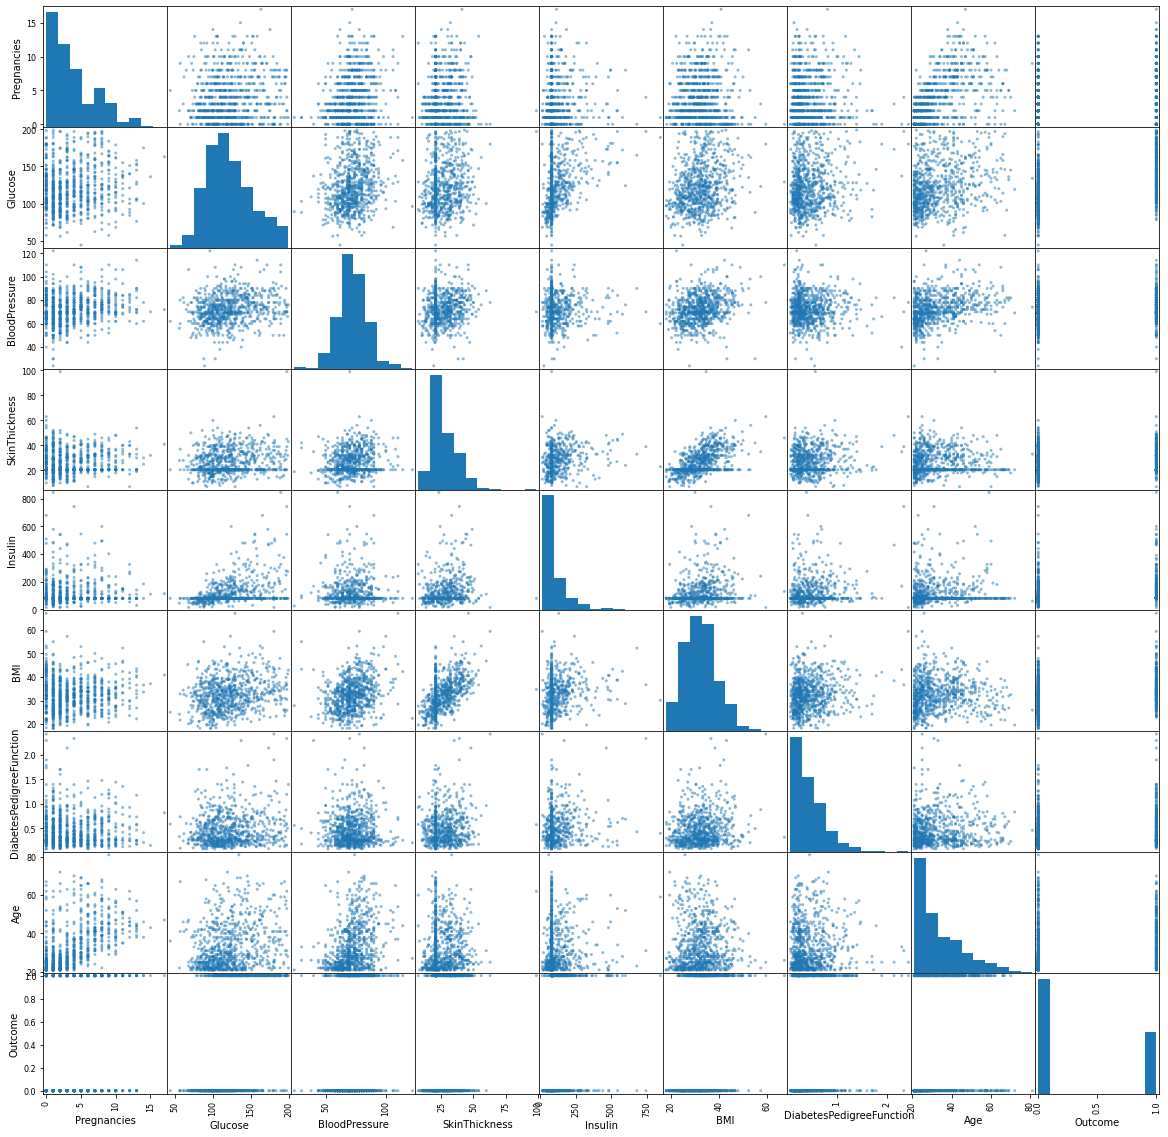

In [30]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(20,20));

## Pairplot

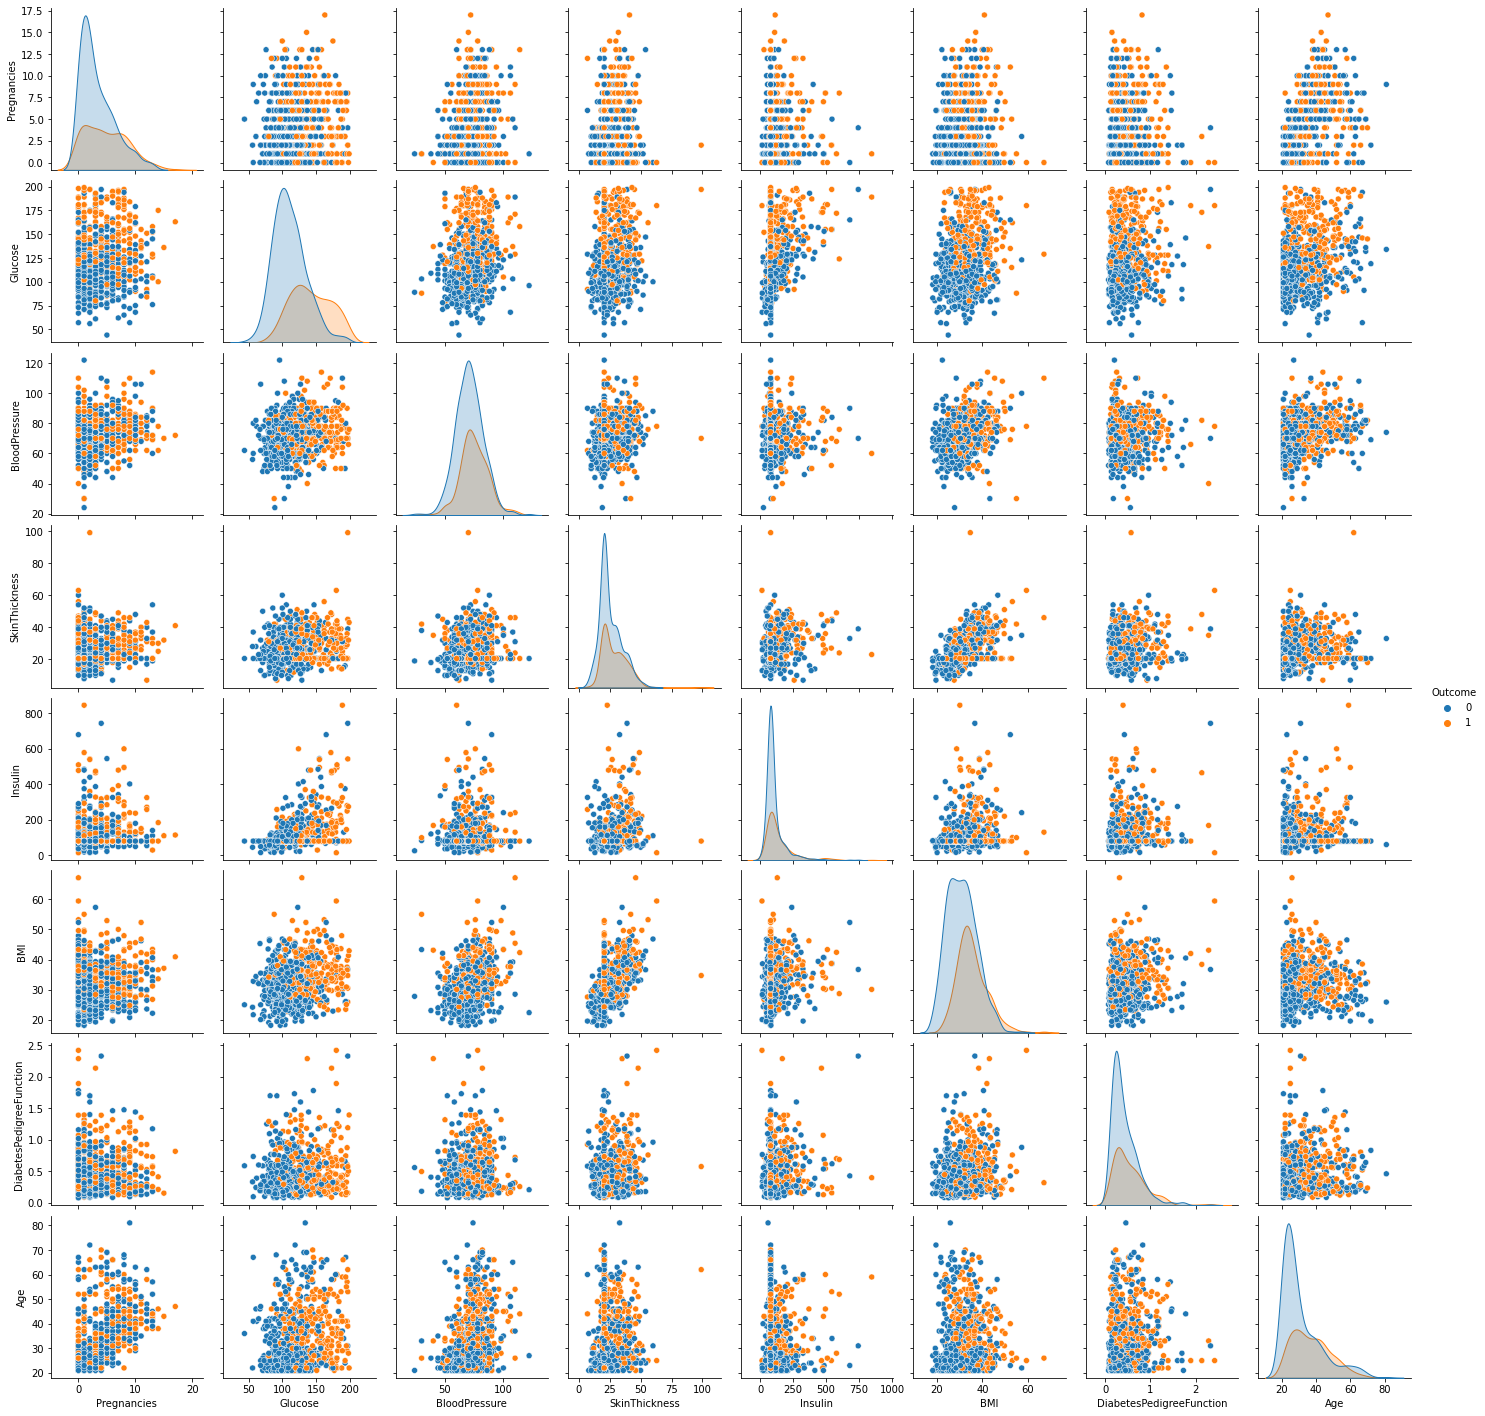

In [31]:
sns.pairplot(data=df, hue='Outcome')
plt.show()

## Analyzing relationships between variables

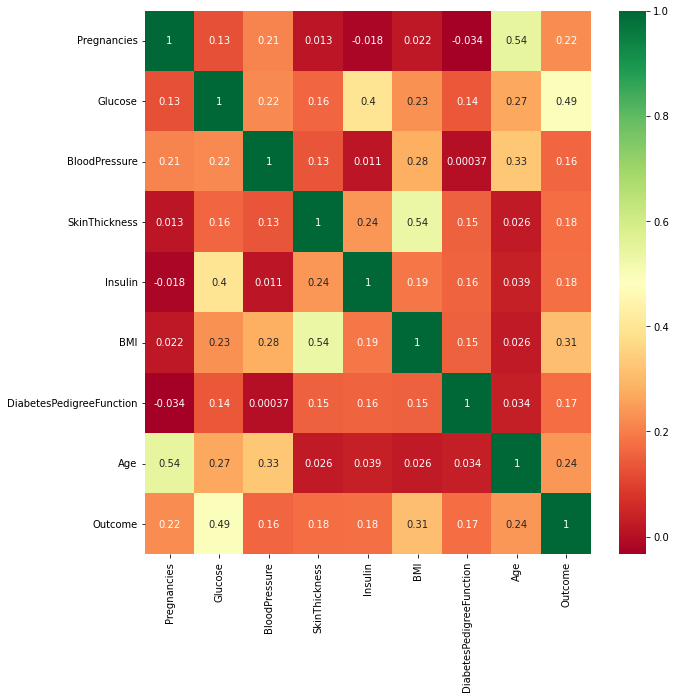

In [34]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

## Split the data frame into X & y

In [36]:
target_name = 'Outcome'

y= df[target_name]
X= df.drop(target_name, axis=1)

In [37]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [38]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

## Apply Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
SSX = scaler.transform(X)

## Train - Test split

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(SSX, y, test_size=0.2, random_state=42)

In [46]:
X_test.shape,y_test.shape

((154, 8), (154,))

In [47]:
X_train.shape,y_train.shape

((614, 8), (614,))

# Data Science

## Build the CLASSIFICATION Algorithms

### Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'liblinear', multi_class='ovr')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

## KNeighborsClssifler (KNN)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Navie-Bayes Classifier

In [56]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Support Vector Machine (SVM)

In [59]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Decision tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy')
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Prediction

### Logistic Regression

In [64]:
X_test.shape

(154, 8)

In [65]:
lr_pred=lr.predict(X_test)

In [66]:
lr_pred.shape

(154,)

### KNN

In [67]:
knn_pred=knn.predict(X_test)

### Naivie Bayes

In [68]:
nb_pred=nb.predict(X_test)

### Support Vector Machine (SVM)

In [77]:
sv_pred=sv.predict(X_test)

### Decesion Tree

In [69]:
dt_pred=dt.predict(X_test)

### Random Forest

In [70]:
rf_pred=rf.predict(X_test)

## Model Evaluation

## Train Score and Test Score

In [73]:
# Logistic Regression
from sklearn.metrics import accuracy_score
print('Train Accuracy of Logistic Regression',lr.score(X_train,y_train)*100)
print('Accuracy (TEST) score of Logistic Regression',lr.score(X_test,y_test)*100)
print('Accuracy (TEST) score of Logistic Regression',accuracy_score(y_test,lr_pred)*100)

Train Accuracy of Logistic Regression 77.0358306188925
Accuracy (TEST) score of Logistic Regression 76.62337662337663
Accuracy (TEST) score of Logistic Regression 76.62337662337663


In [74]:
# KNN
print('Train Accuracy of Logistic Regression',knn.score(X_train,y_train)*100)
print('Accuracy (TEST) score of Logistic Regression',knn.score(X_test,y_test)*100)
print('Accuracy (TEST) score of Logistic Regression',accuracy_score(y_test,knn_pred)*100)

Train Accuracy of Logistic Regression 83.22475570032573
Accuracy (TEST) score of Logistic Regression 76.62337662337663
Accuracy (TEST) score of Logistic Regression 76.62337662337663


In [75]:
# Navie-Bayes
print('Train Accuracy of Logistic Regression',nb.score(X_train,y_train)*100)
print('Accuracy (TEST) score of Logistic Regression',nb.score(X_test,y_test)*100)
print('Accuracy (TEST) score of Logistic Regression',accuracy_score(y_test,nb_pred)*100)

Train Accuracy of Logistic Regression 74.1042345276873
Accuracy (TEST) score of Logistic Regression 75.32467532467533
Accuracy (TEST) score of Logistic Regression 75.32467532467533


In [78]:
# SVM
print('Train Accuracy of Logistic Regression',sv.score(X_train,y_train)*100)
print('Accuracy (TEST) score of Logistic Regression',sv.score(X_test,y_test)*100)
print('Accuracy (TEST) score of Logistic Regression',accuracy_score(y_test,sv_pred)*100)

Train Accuracy of Logistic Regression 82.41042345276874
Accuracy (TEST) score of Logistic Regression 74.02597402597402
Accuracy (TEST) score of Logistic Regression 74.02597402597402


In [79]:
# Decesion Tree
print('Train Accuracy of Logistic Regression',dt.score(X_train,y_train)*100)
print('Accuracy (TEST) score of Logistic Regression',dt.score(X_test,y_test)*100)
print('Accuracy (TEST) score of Logistic Regression',accuracy_score(y_test,dt_pred)*100)

Train Accuracy of Logistic Regression 100.0
Accuracy (TEST) score of Logistic Regression 72.72727272727273
Accuracy (TEST) score of Logistic Regression 72.72727272727273


In [80]:
# Random Forest
print('Train Accuracy of Logistic Regression',rf.score(X_train,y_train)*100)
print('Accuracy (TEST) score of Logistic Regression',rf.score(X_test,y_test)*100)
print('Accuracy (TEST) score of Logistic Regression',accuracy_score(y_test,rf_pred)*100)

Train Accuracy of Logistic Regression 100.0
Accuracy (TEST) score of Logistic Regression 73.37662337662337
Accuracy (TEST) score of Logistic Regression 73.37662337662337


## Confusion Matrix

In [90]:
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(y_test,lr_pred)
cm

array([[83, 16],
       [20, 35]])

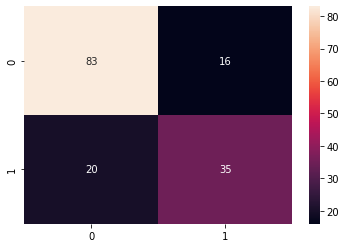

In [91]:
sns.heatmap(confusion_matrix(y_test,lr_pred),annot=True,fmt='d')

In [92]:
TN= cm[0,0]
FP= cm[0,1]
FN= cm[1,0]
TP= cm[1,1]

In [93]:
TN, FP, FN, TP

(83, 16, 20, 35)

In [95]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, lr_pred)

print('TN - True Negative {}'.format(cm[0,0]))
print('TN - False Positive {}'.format(cm[0,1]))
print('TN - False Negative {}'.format(cm[1,0]))
print('TN - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))

TN - True Negative 83
TN - False Positive 16
TN - False Negative 20
TN - True Positive 35
Accuracy Rate: 76.62337662337663
Misclassification Rate: 23.376623376623375


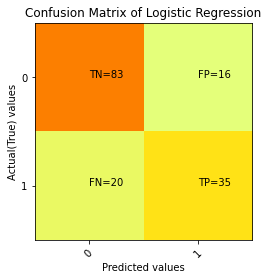

In [98]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames=['0','1']
plt.title('Confusion Matrix of Logistic Regression')
plt.ylabel('Actual(True) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j]+'='+str(cm[i][j])))
plt.show()

In [99]:
pd.crosstab(y_test, lr_pred, margins=False)

col_0,0,1
Outcome,,
0,83,16
1,20,35


In [100]:
pd.crosstab(y_test, lr_pred, margins=True)

col_0,0,1,All
Outcome,,,
0,83,16,99
1,20,35,55
All,103,51,154


In [102]:
pd.crosstab(y_test, lr_pred, rownames=['Actual values'], 
            colnames=['Predicted values'], margins=True)

Predicted values,0,1,All
Actual values,,,
0,83,16,99
1,20,35,55
All,103,51,154


## Precision(PPV-Positive Predictive Value)

In [103]:
TP,FP

(35, 16)

In [104]:
Precision=TP/(TP+FP)
Precision

0.6862745098039216

In [105]:
35/(35+16)

0.6862745098039216

In [107]:
precision_Score = TP / float(TP + FP)*100
print('Precision score : {0:0.4f}'.format(precision_Score))

Precision score : 68.6275


In [111]:
from sklearn.metrics import precision_score
print('precision Score is:', precision_score(y_test,lr_pred)*100)
print('Micro Average precision Score is:', precision_score(y_test,lr_pred,average='micro')*100)
print('Macro Average precision Score is:', precision_score(y_test,lr_pred,average='macro')*100)
print('Weighted Average precision Score is:', precision_score(y_test,lr_pred,average='weighted')*100)
print('precision Score on Non weighted score is:', precision_score(y_test,lr_pred, average=None)*100)

precision Score is: 68.62745098039215
Micro Average precision Score is: 76.62337662337663
Macro Average precision Score is: 74.6049876261184
Weighted Average precision Score is: 76.31285523918305
precision Score on Non weighted score is: [80.58252427 68.62745098]


In [112]:
print('Classification Report of Logistic Regression: \n', classification_report(y_test,lr_pred,digits=4))

Classification Report of Logistic Regression: 
               precision    recall  f1-score   support

           0     0.8058    0.8384    0.8218        99
           1     0.6863    0.6364    0.6604        55

    accuracy                         0.7662       154
   macro avg     0.7460    0.7374    0.7411       154
weighted avg     0.7631    0.7662    0.7641       154



## False Positive Rate (FPR)

In [114]:
FPR = FP / float(FP+TN)*100
print('False Positive Rate: {0:0.4f}'.format(FPR))

False Positive Rate: 16.1616


In [115]:
FP, TN

(16, 83)

In [116]:
16/(16+83)

0.16161616161616163

## Specificity

In [117]:
specificity = TN/(TN+FP)*100
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 83.8384


## F1-Score

In [119]:
from sklearn.metrics import f1_score
print('f1_score of macro :',f1_score(y_test, lr_pred)*100)

f1_score of macro : 66.0377358490566


In [120]:
print('Micro Average F1_Score is:', f1_score(y_test,lr_pred,average='micro')*100)
print('Macro Average F1_Score is:', f1_score(y_test,lr_pred,average='macro')*100)
print('Weighted Average F1_Score is:', f1_score(y_test,lr_pred,average='weighted')*100)
print('F1_Score on Non weighted is:', f1_score(y_test,lr_pred, average=None)*100)

Micro Average F1_Score is: 76.62337662337663
Macro Average F1_Score is: 74.1079768354194
Weighted Average F1_Score is: 76.41375997438018
F1_Score on Non weighted is: [82.17821782 66.03773585]


## Classification Report of Logistic Regression

In [121]:
from sklearn.metrics import classification_report
print('Classification Report of Logistic Regression: \n', classification_report(y_test,lr_pred,digits=4))

Classification Report of Logistic Regression: 
               precision    recall  f1-score   support

           0     0.8058    0.8384    0.8218        99
           1     0.6863    0.6364    0.6604        55

    accuracy                         0.7662       154
   macro avg     0.7460    0.7374    0.7411       154
weighted avg     0.7631    0.7662    0.7641       154



## ROC Curve and ROC AUC

## Confusion Logistic Regression

In [122]:
auc = roc_auc_score(y_test, lr_pred)
print('ROC AUC SCORE of Logistic Regression is',auc)

ROC AUC SCORE of Logistic Regression is 0.7373737373737373


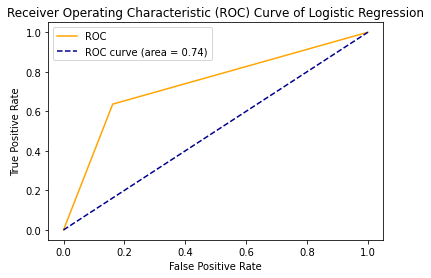

In [124]:
fpr, tpr, thresholds = roc_curve(y_test, lr_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1],[0,1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Logistic Regression')
plt.legend()
plt.show()

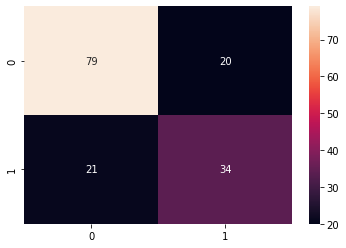

In [127]:
sns.heatmap(confusion_matrix(y_test,rf_pred),annot=True,fmt='d')

## Confusion Matrix of KNN

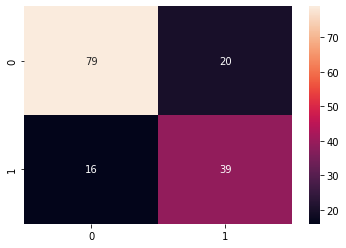

In [128]:
sns.heatmap(confusion_matrix(y_test,knn_pred),annot=True,fmt='d')

In [129]:
cm = confusion_matrix(y_test, knn_pred)

print('TN - True Negative {}'.format(cm[0,0]))
print('TN - False Positive {}'.format(cm[0,1]))
print('TN - False Negative {}'.format(cm[1,0]))
print('TN - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))

TN - True Negative 79
TN - False Positive 20
TN - False Negative 16
TN - True Positive 39
Accuracy Rate: 76.62337662337663
Misclassification Rate: 23.376623376623375


In [130]:
print('Classification Report of KNN: \n', classification_report(y_test,knn_pred,digits=4))

Classification Report of KNN: 
               precision    recall  f1-score   support

           0     0.8316    0.7980    0.8144        99
           1     0.6610    0.7091    0.6842        55

    accuracy                         0.7662       154
   macro avg     0.7463    0.7535    0.7493       154
weighted avg     0.7707    0.7662    0.7679       154



### Are Under Curve of KNN

In [137]:
auc = roc_auc_score(y_test, knn_pred)
print('ROC AUC SCORE of KNN is',auc)

ROC AUC SCORE of KNN is 0.7535353535353535


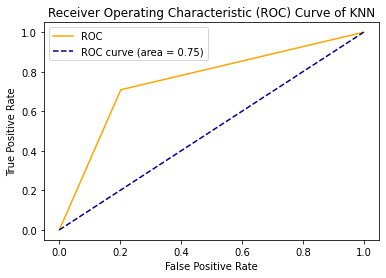

In [132]:
fpr, tpr, thresholds = roc_curve(y_test, knn_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1],[0,1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of KNN')
plt.legend()
plt.show()

## Confusion Matrix of Naive Bayes

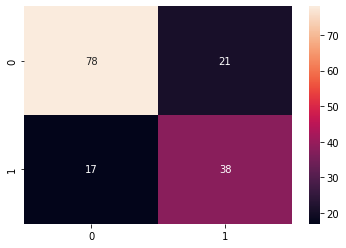

In [150]:
sns.heatmap(confusion_matrix(y_test,nb_pred),annot=True,fmt='d')

In [151]:
cm = confusion_matrix(y_test, nb_pred)

print('TN - True Negative {}'.format(cm[0,0]))
print('TN - False Positive {}'.format(cm[0,1]))
print('TN - False Negative {}'.format(cm[1,0]))
print('TN - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))

TN - True Negative 78
TN - False Positive 21
TN - False Negative 17
TN - True Positive 38
Accuracy Rate: 75.32467532467533
Misclassification Rate: 24.675324675324674


In [152]:
print('Classification Report of Naive Bayes : \n', classification_report(y_test,knn_pred,digits=4))

Classification Report of Naive Bayes : 
               precision    recall  f1-score   support

           0     0.8316    0.7980    0.8144        99
           1     0.6610    0.7091    0.6842        55

    accuracy                         0.7662       154
   macro avg     0.7463    0.7535    0.7493       154
weighted avg     0.7707    0.7662    0.7679       154



### Are Under Curve of Naive Bayes

In [153]:
auc = roc_auc_score(y_test, knn_pred)
print('ROC AUC SCORE of Naive Bayes is',auc)

ROC AUC SCORE of Naive Bayes is 0.7535353535353535


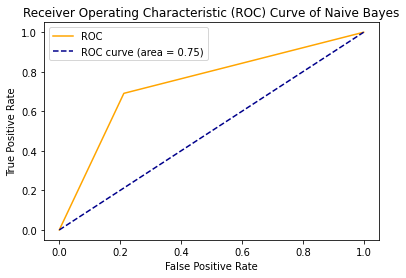

In [154]:
fpr, tpr, thresholds = roc_curve(y_test, nb_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1],[0,1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Naive Bayes')
plt.legend()
plt.show()

## Confusion Matrix of SVM

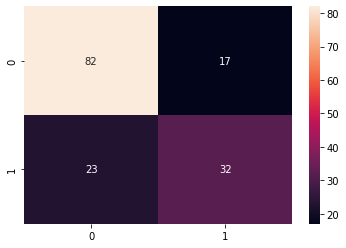

In [160]:
sns.heatmap(confusion_matrix(y_test,sv_pred),annot=True,fmt='d')

In [161]:
cm = confusion_matrix(y_test, sv_pred)

print('TN - True Negative {}'.format(cm[0,0]))
print('TN - False Positive {}'.format(cm[0,1]))
print('TN - False Negative {}'.format(cm[1,0]))
print('TN - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))

TN - True Negative 82
TN - False Positive 17
TN - False Negative 23
TN - True Positive 32
Accuracy Rate: 74.02597402597402
Misclassification Rate: 25.97402597402597


In [146]:
print('Classification Report of SVM : \n', classification_report(y_test,sv_pred,digits=4))

Classification Report of SVM : 
               precision    recall  f1-score   support

           0     0.8316    0.7980    0.8144        99
           1     0.6610    0.7091    0.6842        55

    accuracy                         0.7662       154
   macro avg     0.7463    0.7535    0.7493       154
weighted avg     0.7707    0.7662    0.7679       154



### Are Under Curve of SVM

In [148]:
auc = roc_auc_score(y_test, sv_pred)
print('ROC AUC SCORE of SVM is',auc)

ROC AUC SCORE of SVM is 0.705050505050505


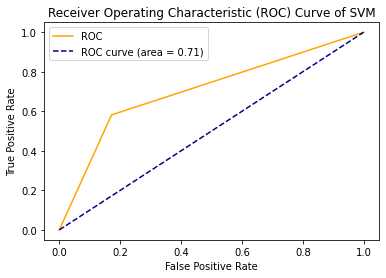

In [149]:
fpr, tpr, thresholds = roc_curve(y_test, sv_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1],[0,1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of SVM')
plt.legend()
plt.show()

## Confusion Matrix of Decesion Tree

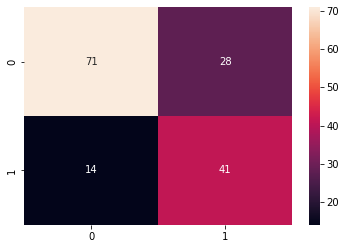

In [155]:
sns.heatmap(confusion_matrix(y_test,dt_pred),annot=True,fmt='d')

In [156]:
cm = confusion_matrix(y_test, dt_pred)

print('TN - True Negative {}'.format(cm[0,0]))
print('TN - False Positive {}'.format(cm[0,1]))
print('TN - False Negative {}'.format(cm[1,0]))
print('TN - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))

TN - True Negative 71
TN - False Positive 28
TN - False Negative 14
TN - True Positive 41
Accuracy Rate: 72.72727272727273
Misclassification Rate: 27.27272727272727


In [157]:
print('Classification Report of Decesion Tree: \n', classification_report(y_test,dt_pred,digits=4))

Classification Report of Decesion Tree: 
               precision    recall  f1-score   support

           0     0.8353    0.7172    0.7717        99
           1     0.5942    0.7455    0.6613        55

    accuracy                         0.7273       154
   macro avg     0.7147    0.7313    0.7165       154
weighted avg     0.7492    0.7273    0.7323       154



### Are Under Curve of Decesion Tree

In [158]:
auc = roc_auc_score(y_test, dt_pred)
print('ROC AUC SCORE of Decesion Tree is',auc)

ROC AUC SCORE of Decesion Tree is 0.7313131313131312


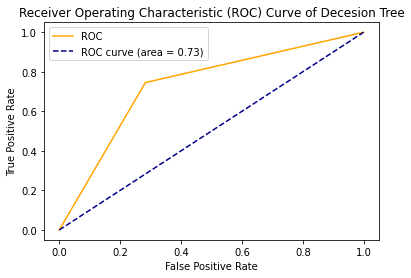

In [159]:
fpr, tpr, thresholds = roc_curve(y_test, dt_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1],[0,1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Decesion Tree')
plt.legend()
plt.show()

## Confusion Matrix of Random Forest

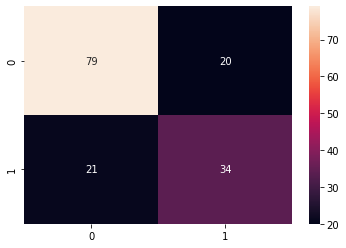

In [162]:
sns.heatmap(confusion_matrix(y_test,rf_pred),annot=True,fmt='d')

In [163]:
cm = confusion_matrix(y_test, rf_pred)

print('TN - True Negative {}'.format(cm[0,0]))
print('TN - False Positive {}'.format(cm[0,1]))
print('TN - False Negative {}'.format(cm[1,0]))
print('TN - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))

TN - True Negative 79
TN - False Positive 20
TN - False Negative 21
TN - True Positive 34
Accuracy Rate: 73.37662337662337
Misclassification Rate: 26.623376623376622


In [164]:
print('Classification Report of Random Forest: \n', classification_report(y_test,rf_pred,digits=4))

Classification Report of Random Forest: 
               precision    recall  f1-score   support

           0     0.7900    0.7980    0.7940        99
           1     0.6296    0.6182    0.6239        55

    accuracy                         0.7338       154
   macro avg     0.7098    0.7081    0.7089       154
weighted avg     0.7327    0.7338    0.7332       154



### Are Under Curve of Random Forest

In [165]:
auc = roc_auc_score(y_test, rf_pred)
print('ROC AUC SCORE of Decesion Tree is',auc)

ROC AUC SCORE of Decesion Tree is 0.7080808080808081


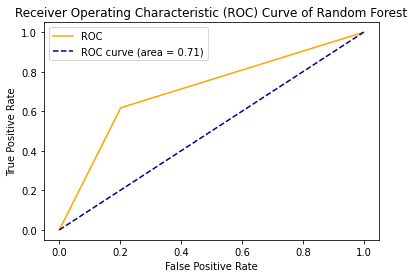

In [166]:
fpr, tpr, thresholds = roc_curve(y_test, rf_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1],[0,1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Random Forest')
plt.legend()
plt.show()